In [673]:
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection  import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [674]:
pd.set_option('display.max_columns', None)

In [675]:
df_test = pd.read_csv('C:/Users/Edward.Moradian/OneDrive - Microsoft/Desktop/Home/Practice/kaggle/kicked/test.csv')

In [676]:
df_training = pd.read_csv('C:/Users/Edward.Moradian/OneDrive - Microsoft/Desktop/Home/Practice/kaggle/kicked/training.csv')

In [677]:
df_training

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [678]:
df_training.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [679]:
df_training['IsBadBuy'] = df_training['IsBadBuy'].astype('str')
df_training['RefId'] = df_training['RefId'].astype('str')
df_training['VehYear'] = df_training['VehYear'].astype('str')
df_training['WheelTypeID'] = df_training['WheelTypeID'].astype('str')
df_training['BYRNO'] = df_training['BYRNO'].astype('str')
df_training['VNZIP1'] = df_training['VNZIP1'].astype('str')
df_training['IsOnlineSale'] = df_training['IsOnlineSale'].astype('str')


In [680]:
df_training['IsBadBuy'].unique()

array(['0', '1'], dtype=object)

In [681]:
df_training.loc[df_training.loc[:,'IsBadBuy'] == 'nan','IsBadBuy'] = None

In [682]:
df_training.loc[df_training['IsBadBuy'].isna(),'IsBadBuy']

Series([], Name: IsBadBuy, dtype: object)

## Exploratory Data Analysis

In [683]:
df_training['IsBadBuy'].value_counts(dropna=False)

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [684]:
df_training['IsBadBuy'].value_counts(normalize=True,dropna=False)

0    0.877012
1    0.122988
Name: IsBadBuy, dtype: float64

<AxesSubplot:ylabel='IsBadBuy'>

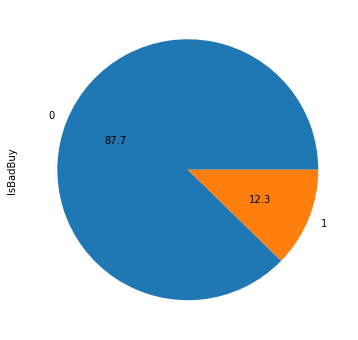

In [685]:
df_training['IsBadBuy'].value_counts(normalize=True,dropna=False).plot(kind='pie',autopct='%.1f',figsize=(8,6))

In [686]:
df_training.columns.sort_values()

Index(['AUCGUART', 'Auction', 'BYRNO', 'Color', 'IsBadBuy', 'IsOnlineSale',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'Make',
       'Model', 'Nationality', 'PRIMEUNIT', 'PurchDate', 'RefId', 'Size',
       'SubModel', 'TopThreeAmericanName', 'Transmission', 'Trim', 'VNST',
       'VNZIP1', 'VehBCost', 'VehOdo', 'VehYear', 'VehicleAge', 'WarrantyCost',
       'WheelType', 'WheelTypeID'],
      dtype='object')

In [687]:
df_training.dtypes.items()

In [688]:
dim_cols = df_training.loc[:,df_training.dtypes == 'object'].columns
fact_cols = df_training.loc[:,df_training.dtypes != 'object'].columns

In [689]:
fact_cols

Index(['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost'],
      dtype='object')

In [690]:
dim_cols

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'Make', 'Model',
       'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART',
       'BYRNO', 'VNZIP1', 'VNST', 'IsOnlineSale'],
      dtype='object')

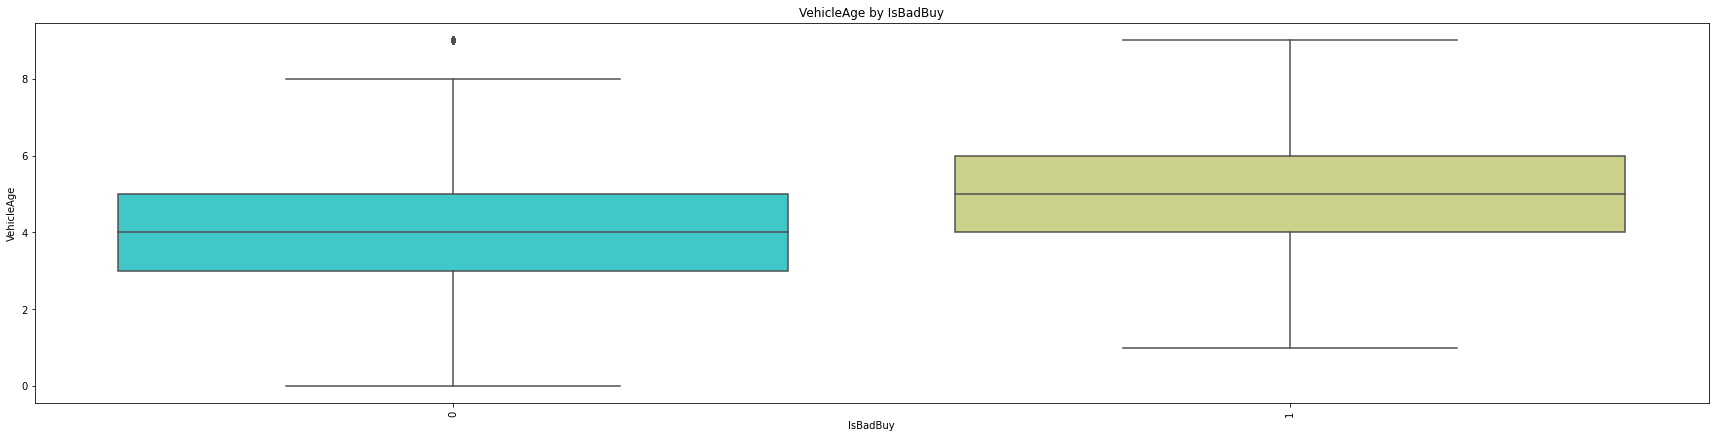

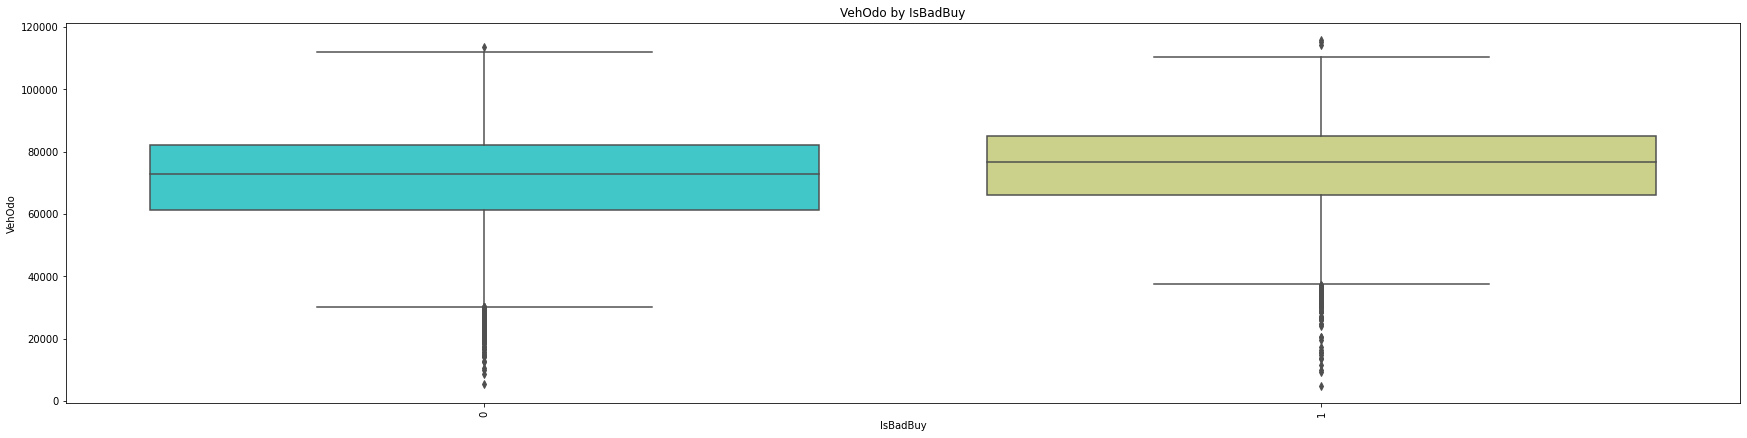

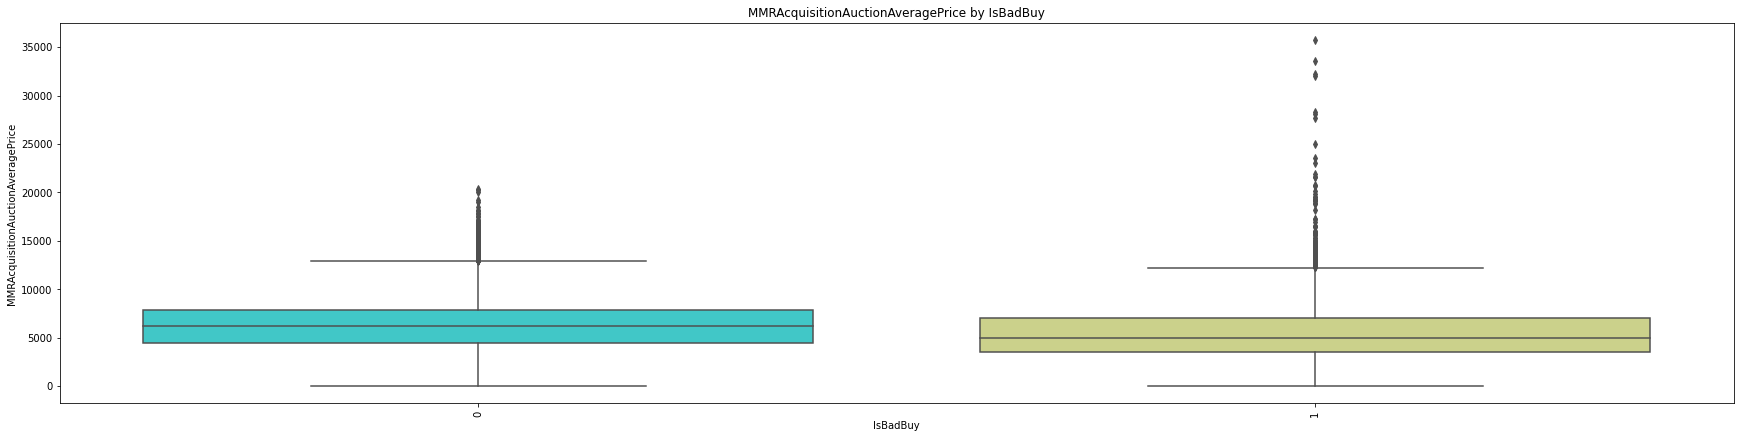

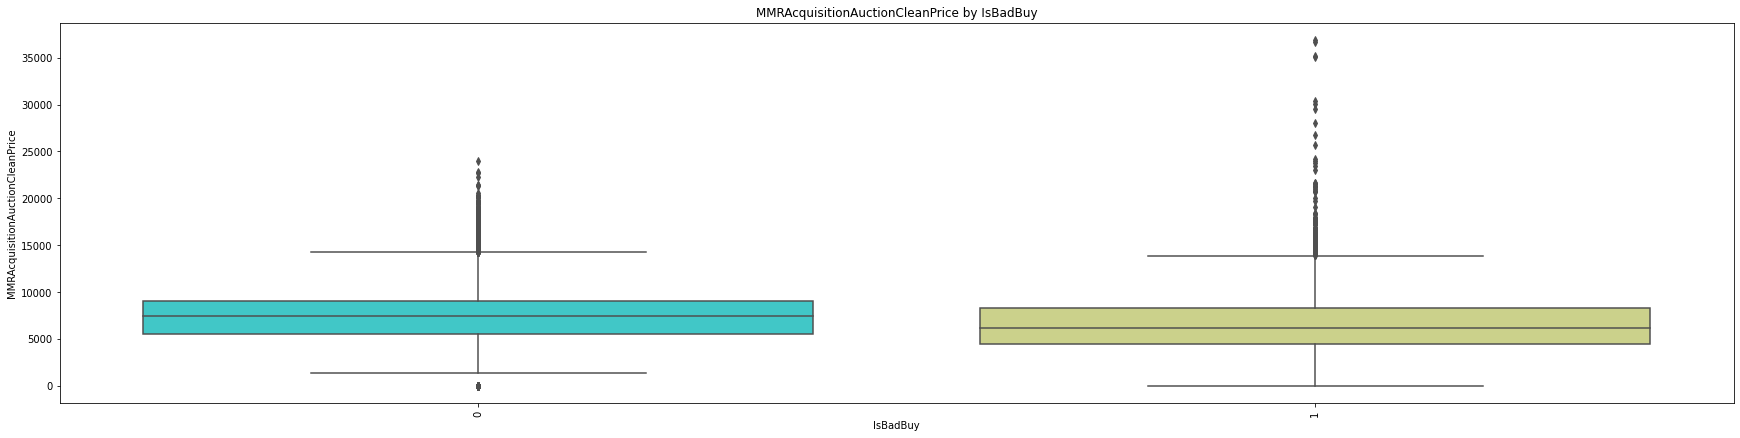

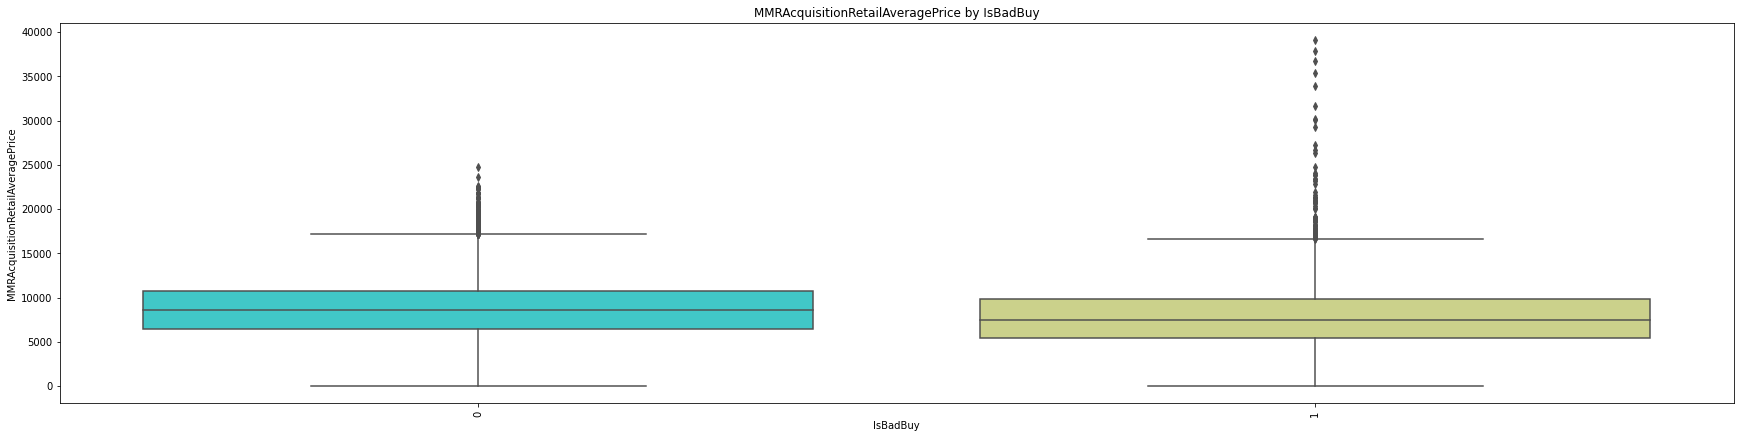

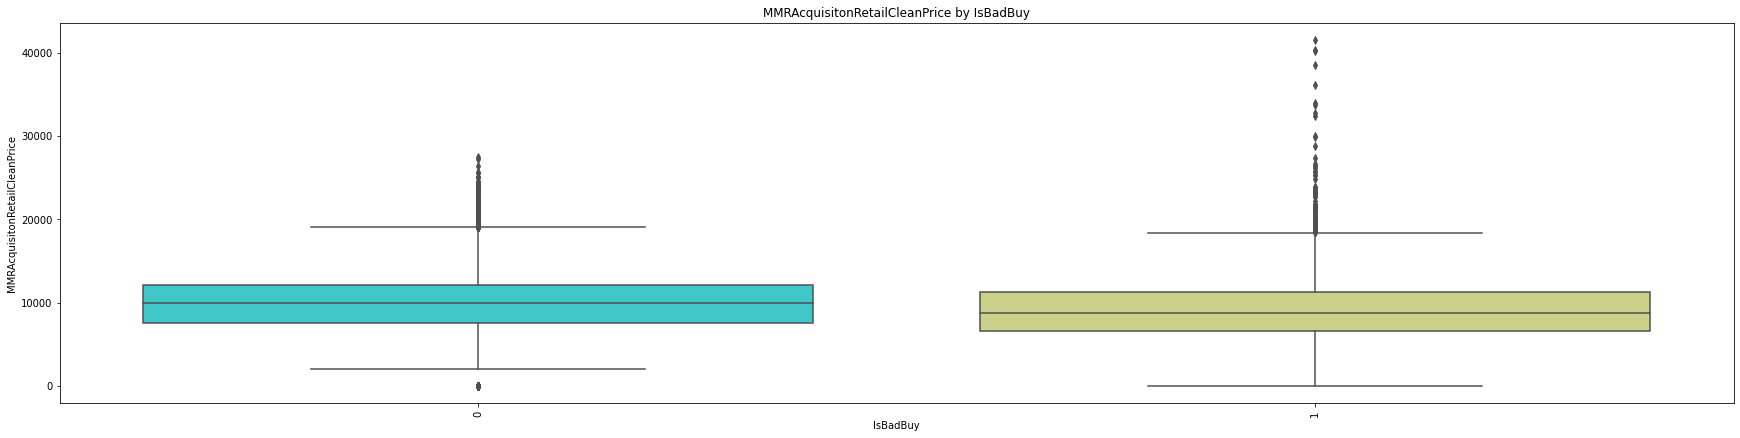

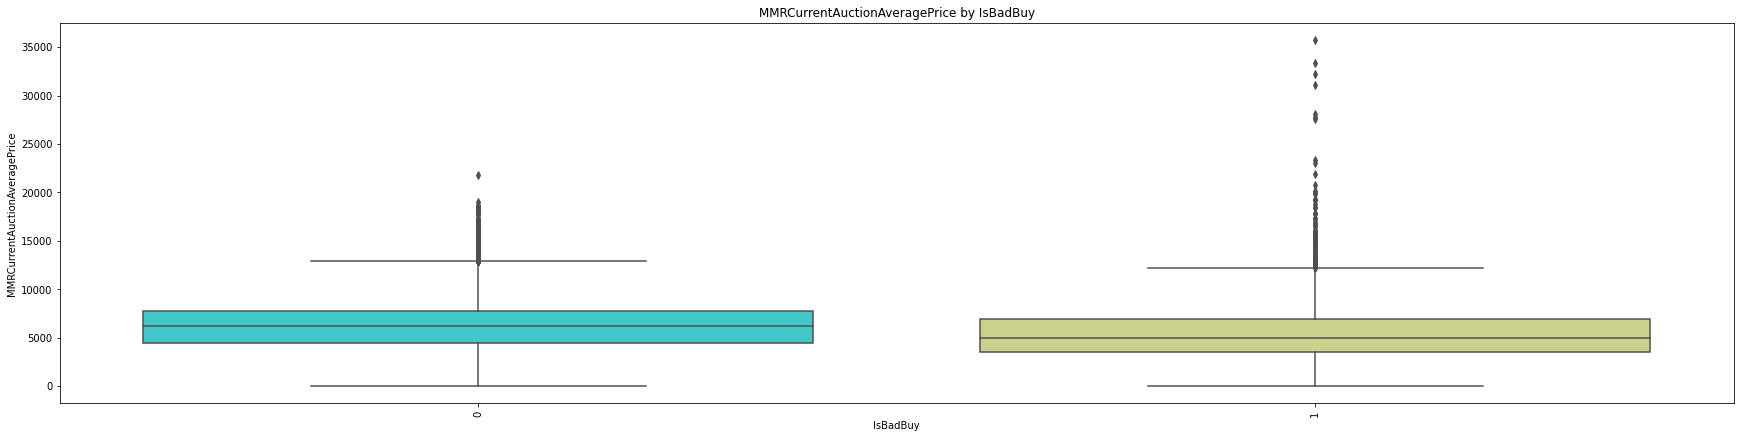

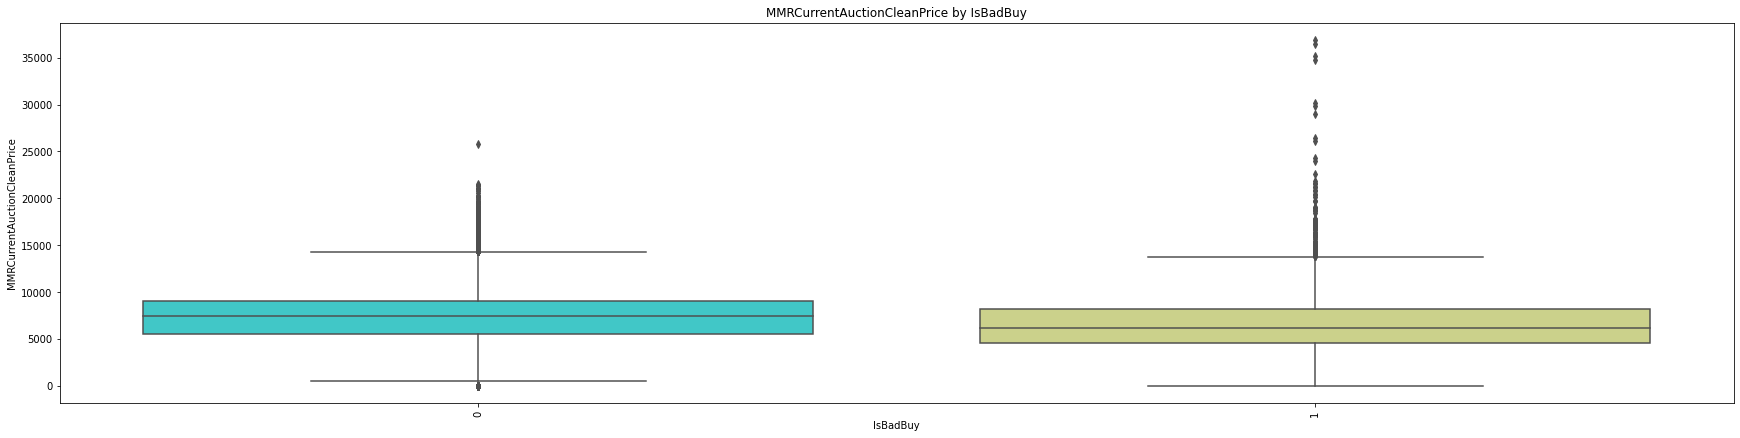

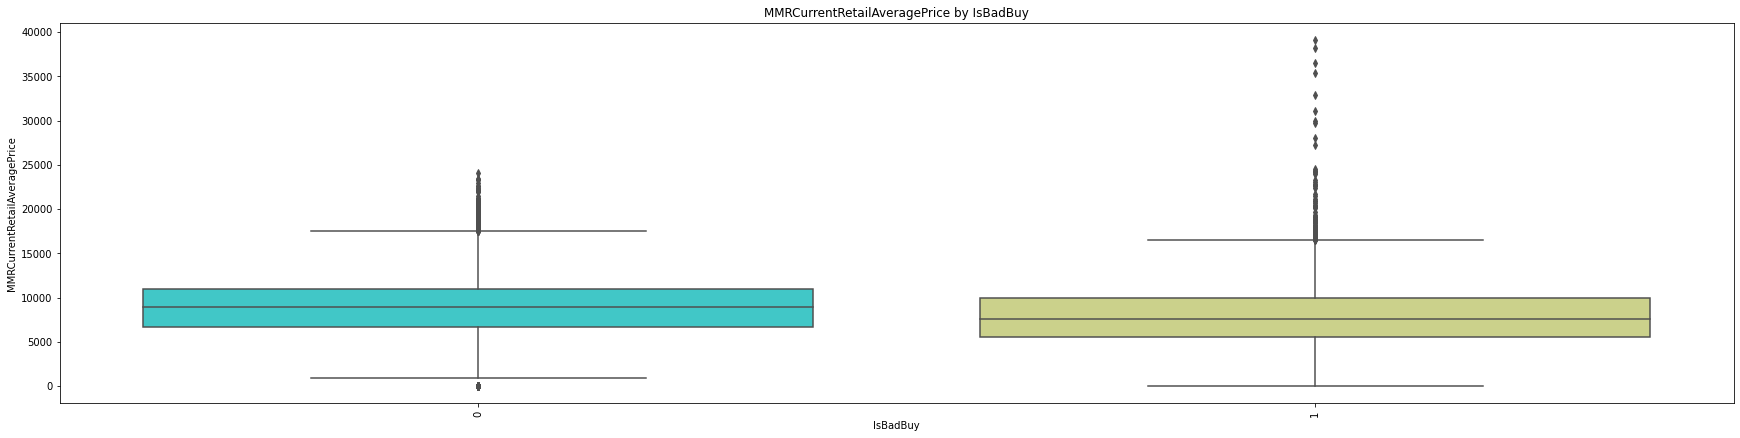

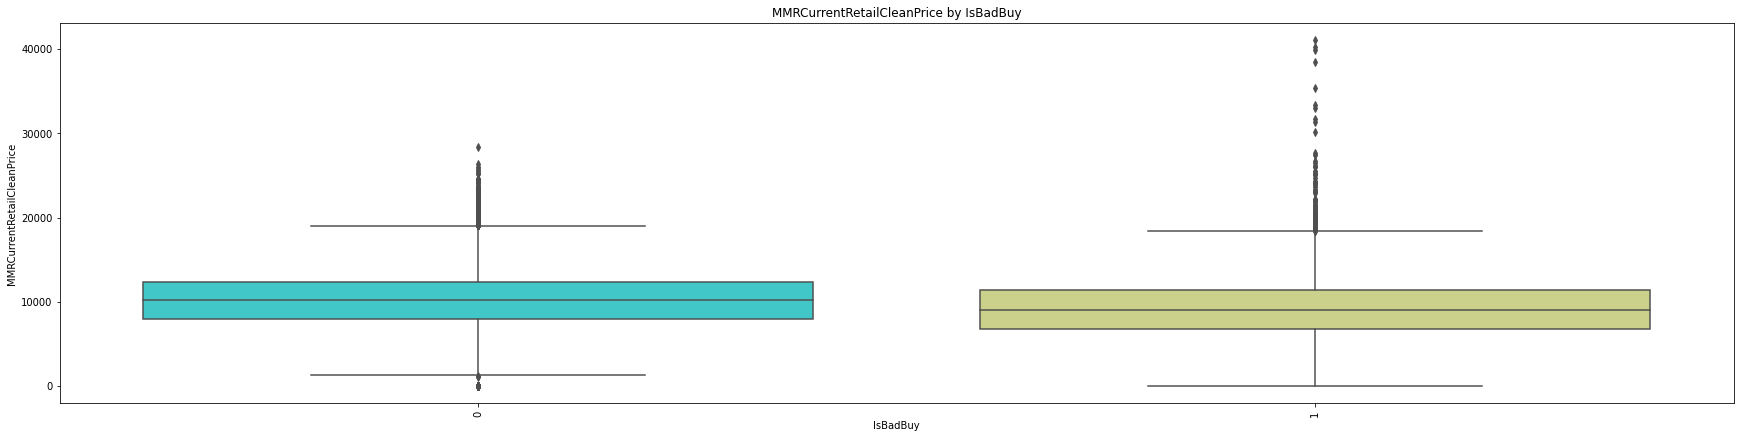

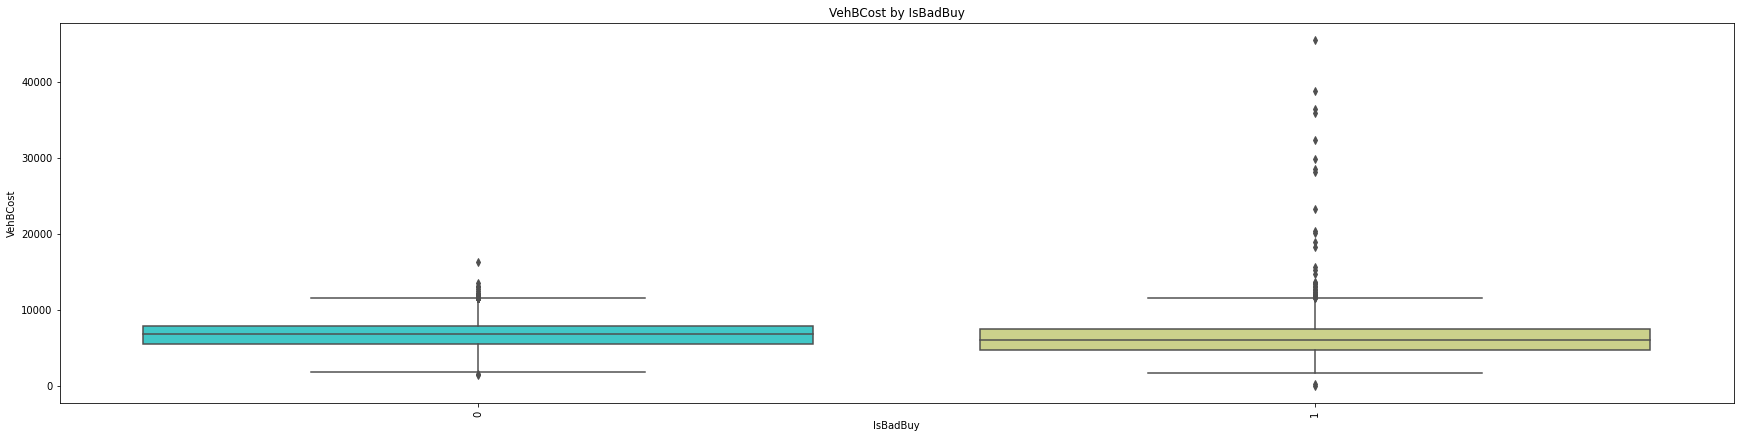

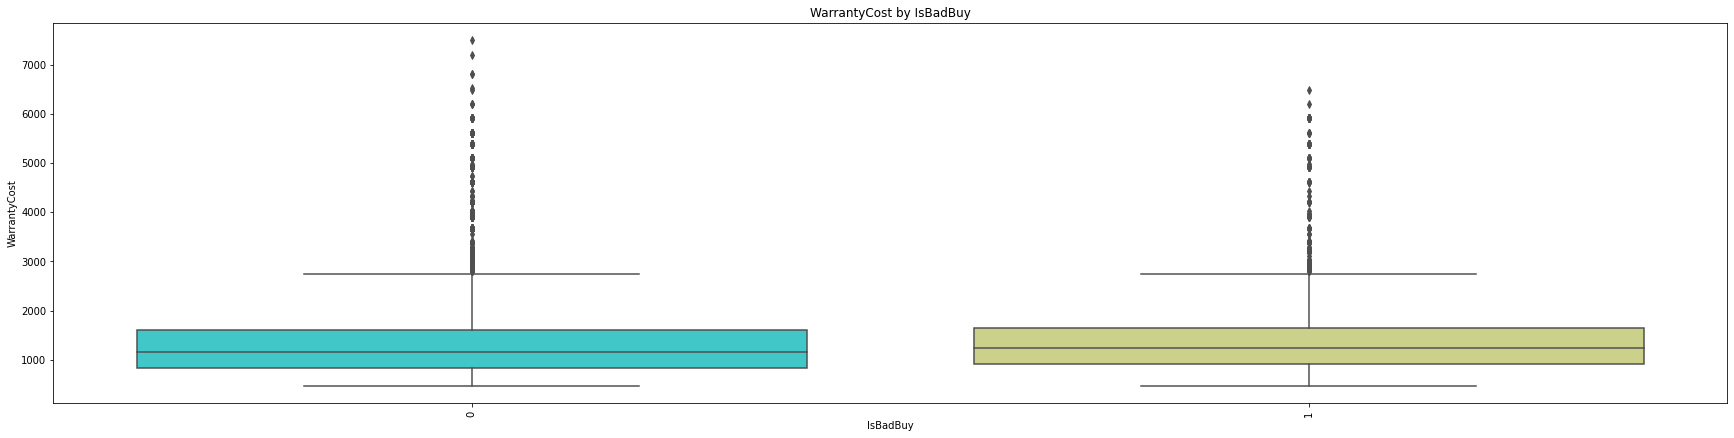

In [691]:
for feature in fact_cols.values:
    plt.figure(figsize=(30,7))
    plt.xticks(rotation='vertical')
    sns.boxplot(x='IsBadBuy',y=feature,data=df_training, palette='rainbow') #,showfliers=False)
    plt.title(feature + " by IsBadBuy")

In [692]:
sig_diff

0    0.001767
1    0.001767
Name: IsOnlineSale, dtype: float64

In [693]:
df_training['SubModel'].nunique

<bound method IndexOpsMixin.nunique of 0               4D SEDAN I
1        QUAD CAB 4.7L SLT
2         4D SEDAN SXT FFV
3                 4D SEDAN
4             2D COUPE ZX3
               ...        
72978          4D SEDAN GS
72979          4D SEDAN LS
72980      4D WAGON LAREDO
72981          4D SEDAN LS
72982           4D SEDAN S
Name: SubModel, Length: 72983, dtype: object>

In [755]:
for dim in dim_cols:
    print('--- '+dim+' ---')
    print(df_training[dim].nunique())
    sig_diff = abs(df_training.loc[df_training.loc[:,'IsBadBuy'] == 1,dim].value_counts(normalize=True,dropna=False) - df_training.loc[df_training.loc[:,'IsBadBuy'] == 0,dim].value_counts(normalize=True,dropna=False))
    print((sig_diff[sig_diff > .01]))
    print()

--- RefId ---
72983
Series([], Name: RefId, dtype: float64)

--- IsBadBuy ---
2
Series([], Name: IsBadBuy, dtype: float64)

--- PurchDate ---
517
Series([], Name: PurchDate, dtype: float64)

--- Auction ---
3
0    0.052995
1    0.042273
2    0.010722
Name: Auction, dtype: float64

--- VehYear ---
10
0    0.030977
1    0.050714
2    0.056422
3    0.042132
4    0.016139
5    0.063017
6    0.065661
7    0.058659
Name: VehYear, dtype: float64

--- Make ---
33
3    0.055931
5    0.032395
6    0.044668
Name: Make, dtype: float64

--- Model ---
1063
477    0.010892
487    0.011257
718    0.018999
885    0.010401
Name: Model, dtype: float64

--- Trim ---
135
55     0.045385
56     0.021643
98     0.011741
115    0.012081
134    0.010639
Name: Trim, dtype: float64

--- SubModel ---
864
232    0.027344
292    0.013154
Name: SubModel, dtype: float64

--- Color ---
17
1    0.010166
2    0.010614
4    0.011897
Name: Color, dtype: float64

--- Transmission ---
4
Series([], Name: Transmission, dtype:

## Modeling

In [695]:
features = df_training.columns.copy().drop('IsBadBuy')
target = 'IsBadBuy'

In [696]:
dim_cols

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'Make', 'Model',
       'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART',
       'BYRNO', 'VNZIP1', 'VNST', 'IsOnlineSale'],
      dtype='object')

In [697]:
df_training.columns.sort_values()

Index(['AUCGUART', 'Auction', 'BYRNO', 'Color', 'IsBadBuy', 'IsOnlineSale',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'Make',
       'Model', 'Nationality', 'PRIMEUNIT', 'PurchDate', 'RefId', 'Size',
       'SubModel', 'TopThreeAmericanName', 'Transmission', 'Trim', 'VNST',
       'VNZIP1', 'VehBCost', 'VehOdo', 'VehYear', 'VehicleAge', 'WarrantyCost',
       'WheelType', 'WheelTypeID'],
      dtype='object')

In [698]:
dim_cols_2 = dim_cols.copy().drop('IsBadBuy')

In [699]:
labelencoder = preprocessing.LabelEncoder()
for col in dim_cols:
    df_training[col] = labelencoder.fit_transform(df_training[col])
for col in dim_cols_2:
    df_test[col] = labelencoder.fit_transform(df_test[col])

In [701]:
df_training['IsBadBuy'].unique()

array([0, 1])

In [702]:
# df_training.loc[df_training.loc[:,'IsBadBuy'] == 'nan','IsBadBuy'] = None

In [703]:
df_training.loc[df_training['IsBadBuy'].isna(),'IsBadBuy']

Series([], Name: IsBadBuy, dtype: int32)

In [709]:
X = df_training.loc[:,features]
y = df_training.loc[:,target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=25)

In [710]:
model = xgb.XGBClassifier(use_label_encoder=False,enable_categorical=False)


In [711]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [712]:
preds = model.predict(X_test)

In [713]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [730]:
model.classes_

array([0, 1])

In [720]:
scores = model.predict_proba(X_test)[:,1]

In [721]:
scores

array([0.02230356, 0.02459993, 0.02376001, ..., 0.01113816, 0.04303354,
       0.06708481], dtype=float32)

In [732]:
X_test['preds'] = preds

In [736]:
X_test.loc[X_test['preds']==1,:]

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,preds
64709,60797,147,0,0,9,4,718,7,152,14,0,1,0,68832,0,5,0,2465.0,3202.0,4807.0,5673.0,2341.0,3053.0,4783.0,5599.0,2,2,44,124,2,4440.00,0,1515,1
34036,26719,67,1,5,3,13,208,63,507,1,0,1,0,55452,0,3,0,17229.0,19745.0,19107.0,21825.0,17240.0,19769.0,21688.0,24396.0,2,2,57,111,4,15600.76,0,1583,1
66715,63025,317,0,6,3,29,142,53,185,13,0,4,3,71891,3,5,3,10169.0,11129.0,14035.0,15202.0,10169.0,11129.0,14035.0,15202.0,2,2,38,20,19,10175.00,0,569,1
35705,28573,436,1,2,6,4,721,7,152,2,0,2,1,76378,0,5,0,2910.0,3728.0,3643.0,4526.0,3104.0,3831.0,3852.0,4637.0,2,2,29,10,34,4500.00,0,1689,1
56041,51165,19,2,1,8,5,662,7,152,13,0,1,0,79587,0,0,0,1536.0,2172.0,4383.0,4812.0,1722.0,2410.0,4174.0,5068.0,2,2,35,27,6,3200.00,0,986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54686,49660,483,2,4,4,3,197,7,152,14,0,4,3,84323,0,0,2,4965.0,6233.0,5862.0,7232.0,4987.0,6298.0,5886.0,7302.0,2,2,68,87,27,4910.00,0,853,1
18065,8973,445,2,4,5,6,651,7,12,12,0,4,3,71854,0,10,1,8082.0,9492.0,11155.0,12653.0,7977.0,9429.0,11679.0,12880.0,2,2,28,118,33,8410.00,1,803,1
70455,67181,18,0,0,8,3,565,7,152,13,0,2,1,74237,0,5,2,1920.0,2715.0,2574.0,3432.0,1881.0,2723.0,2531.0,3441.0,2,2,42,103,32,3170.00,0,2508,1
17789,8667,440,2,5,3,6,375,127,312,0,0,4,3,61583,0,0,1,4364.0,5434.0,5213.0,6369.0,4364.0,5434.0,5213.0,6369.0,2,2,57,118,33,6210.00,0,1020,1


Text(0.5, 0, 'Xgboost Feature Importance')

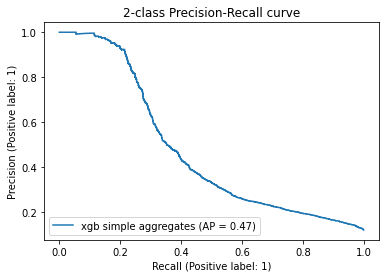

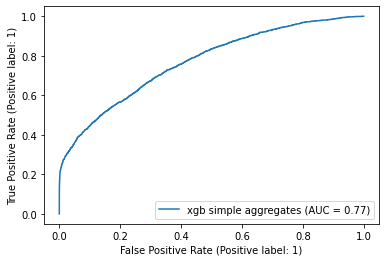

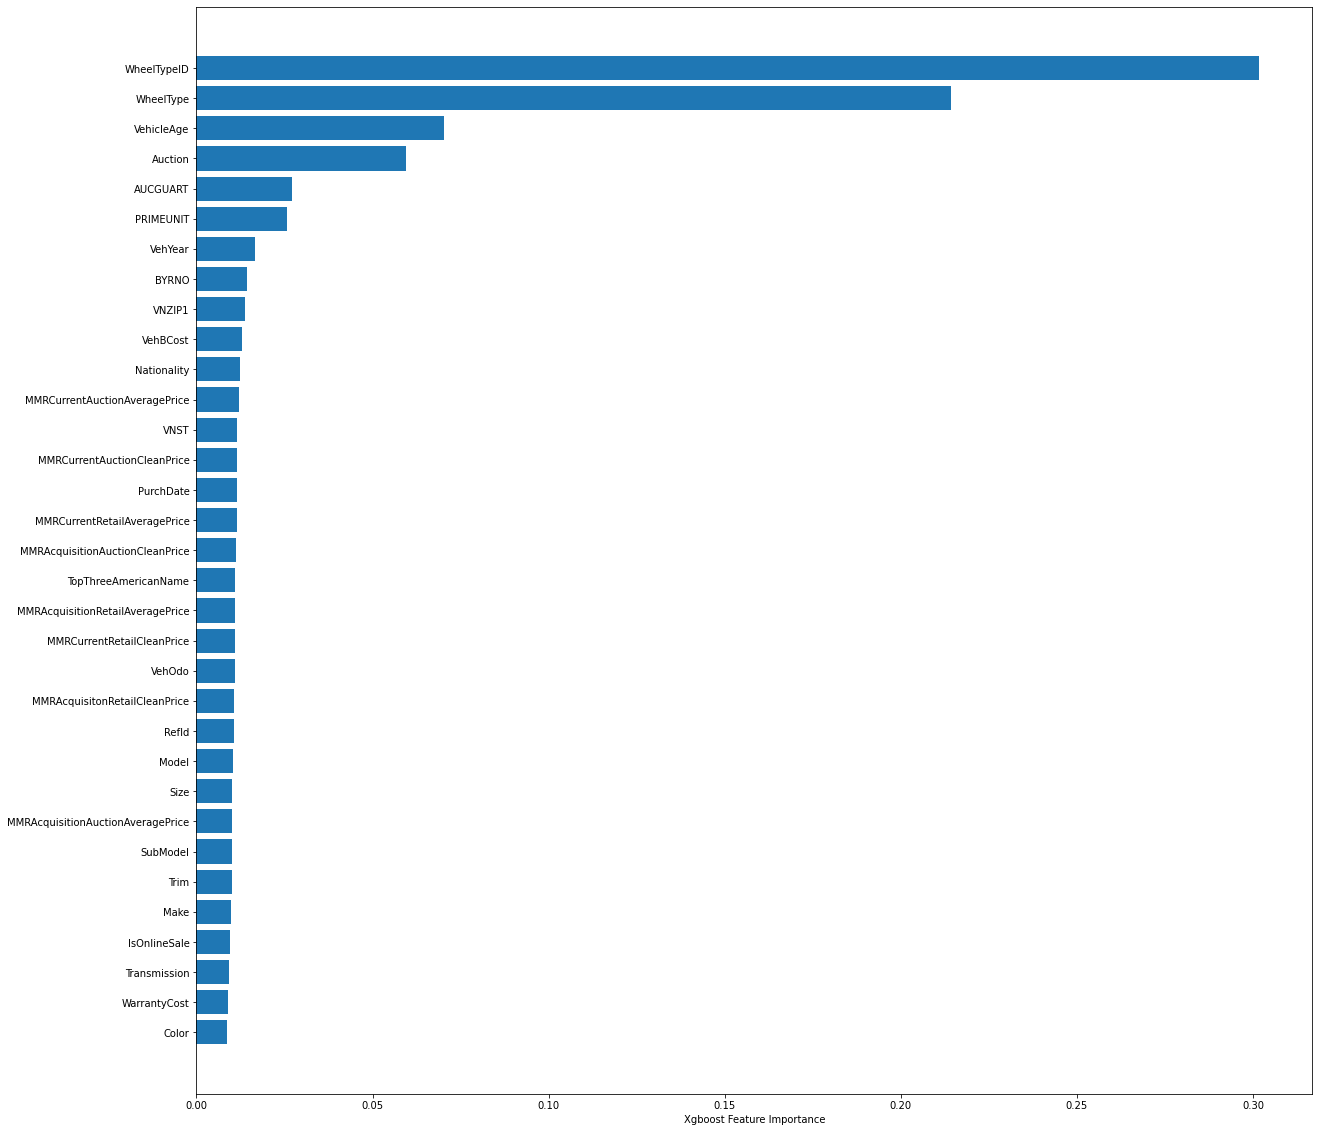

In [722]:
display = PrecisionRecallDisplay.from_predictions(y_test, scores, name="xgb simple aggregates")
_ = display.ax_.set_title("2-class Precision-Recall curve")

RocCurveDisplay.from_predictions(y_test, scores, name="xgb simple aggregates")

sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize= (20,20))
plt.barh([X.columns[x] for x in sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

#### predict for submission

In [738]:
preds_test = model.predict(df_test)

In [739]:
preds_test

array([0, 0, 0, ..., 0, 0, 0])

In [740]:
df_submission = pd.DataFrame()

In [742]:
df_submission['RefId'] = df_test['RefId']

In [744]:
df_submission['IsBadBuy'] = preds_test

In [750]:
df_submission.to_csv('C:/Users/Edward.Moradian/OneDrive - Microsoft/Desktop/Home/Practice/kaggle/kicked/df_submission.csv',index=False)